In [1]:
#importing the necessary libraries that will be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
#load the training dataset

data = pd.read_csv (r"C:\Users\ChizobaEnechukwu\Desktop\diabetes.csv")

# Exploratory Data Analysis 

In [4]:
#view the first 5 rows of the table

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


This data consists of information about some patients who have been tested for diabetes. The dependent feature is 'outcome' which contains the value ***0*** for patients who tested negative for diabetes, and ***1*** for patients who tested positive. While the independent feature are 'Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age' which will be used to determine the dependent feature.

In [5]:
#To check for empty rows

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#To know how many columns and rows are in the dataset

data.shape

(768, 9)

In [9]:
#Data types

data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
# To check how many unique values are present in Outcome column 

data['Outcome'].nunique()

2

In [64]:
#To check how many values are in each type of Outcome (0 and 1)

data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

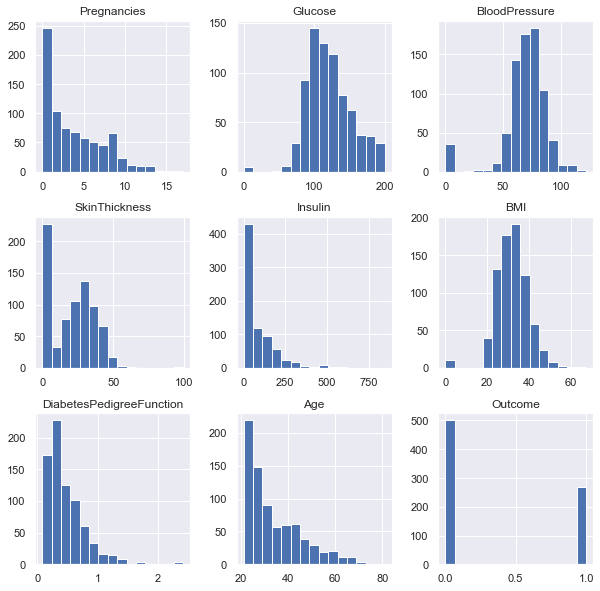

In [70]:
#Lets evaluate the frequency distribution of each feature
data.hist(bins=15, figsize=(10,10))
plt.show()

NB: It is impossible to have Glucose, Blood pressure, Skin thickness, Insulin and BMI of zero.This means we will have to replace the zeros with mean.

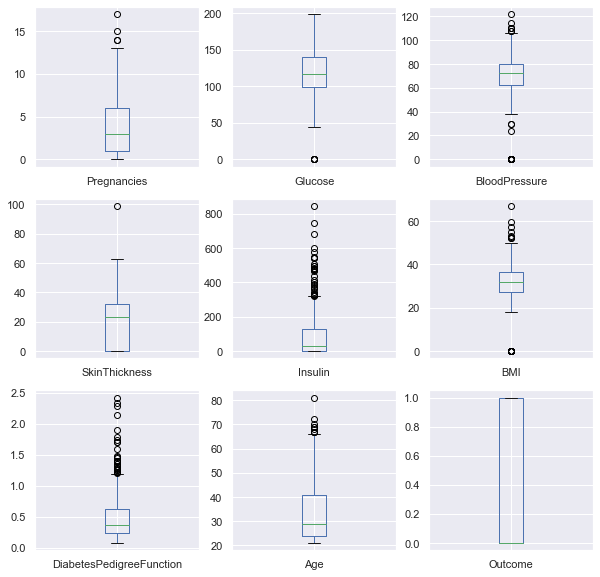

In [47]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

It is observed that there are outliers in certain columns. The question is should we remove outliers or use them in training our models?

In [66]:
#Checking how many rows contains zero in each column
(data==0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [72]:
#Replaced the zero row in specified columns with their mean

column = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in column:
    data[i].replace(0, data[i].mean(), inplace=True)

In [73]:
(data==0).sum(axis=0)

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

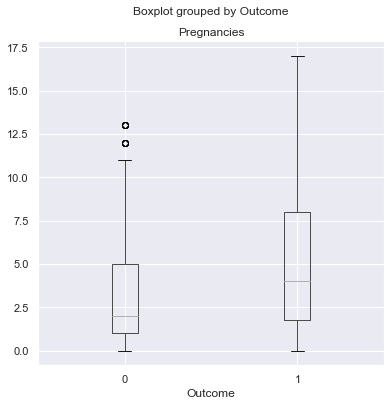

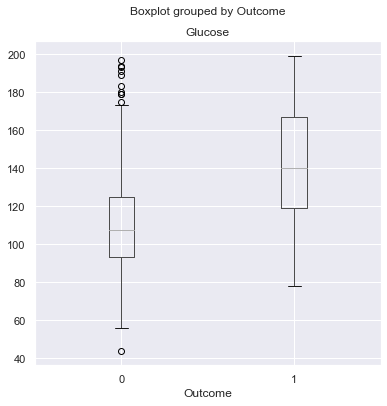

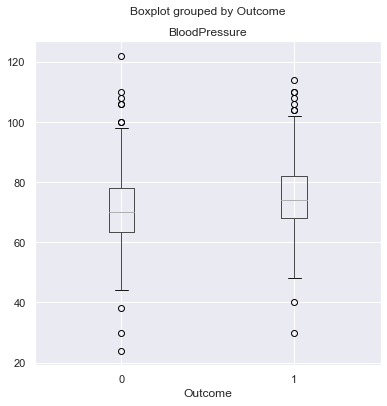

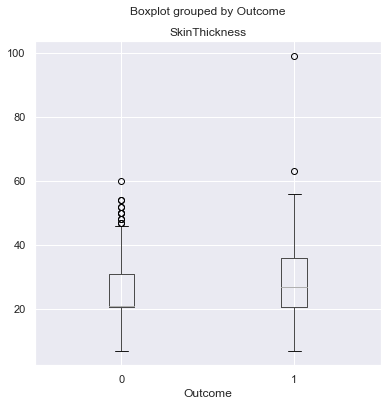

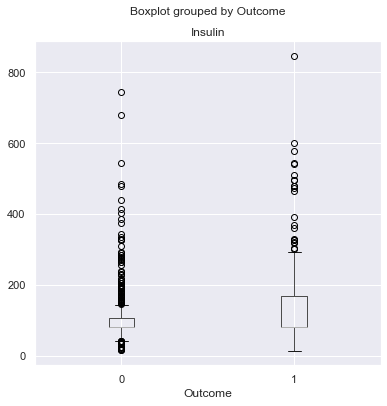

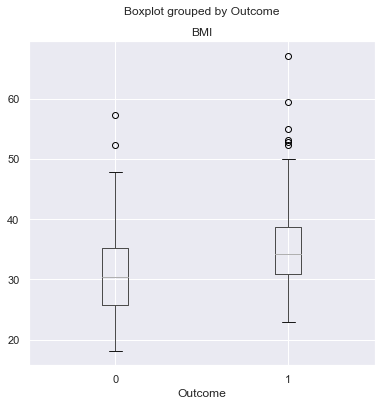

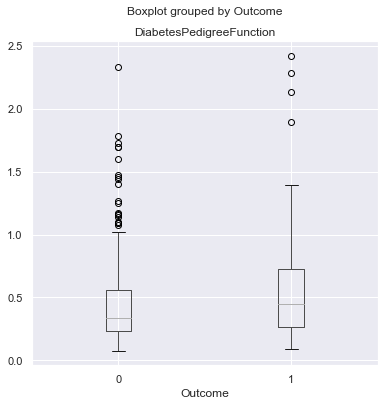

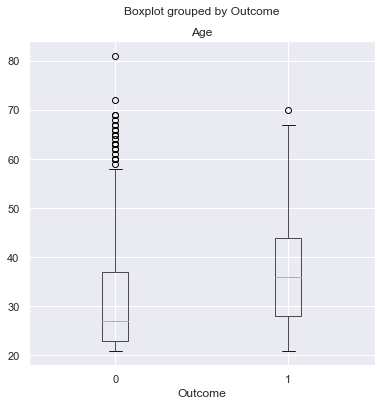

In [80]:
%matplotlib inline

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in features:
    data.boxplot(column=i, by='Outcome', figsize=(6,6))
    plt.title(i)
plt.show()

In [134]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,25.373135,106.457354,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,28.907494,141.426597,35.381288,0.550500,37.067164


#### They following can be deduced from the analysis above;
* Higher number of pregnancy, more risk of having Diabetes
* High Glucose level leads to more chance of Diabetes
* Sight chance that high blood pressure can lead to Diabetes
* High Insulin level, more chances of getting diabete. NB this is questionable because insulin helps in the regulation of blood glucose level thus Type 1 is caused by insufficient insulin. Could it be that the patients have Type 2 diabetes (meaning they are insulin resistant.
* Higher BMI, more chances  of having Diabetes.
* Higher DiabetesPedigreeFunction, more chances of getting Diabetes. This means that genetiics plays a role in the chances of getting Diabetes.
* Younger people have less chances of getting Diabetes.

In [74]:
#Determining correlation between variables

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot:>

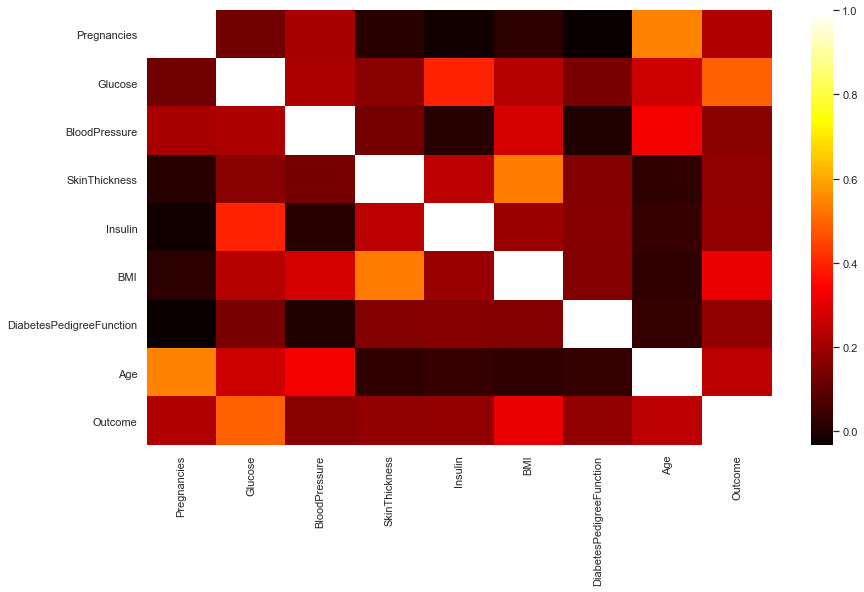

In [75]:
plt.figure(figsize=(14,8))
data_corr= data.corr()
sns.heatmap(data_corr, cmap='hot')

# Building of Model

In [81]:
#Seperate dependent feature (y) and independent features (x)

label ='Outcome'
x,y= data[feature].values, data[label].values

### Logistic Regression without Scaling

In [124]:
from sklearn.model_selection import train_test_split

# Split data 80%-20% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (x_train.shape[0], x_test.shape[0]))

Training cases: 614
Test cases: 154


In [125]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate. NB; This is used to counteract any bias in the sample, and help the model generalize well by avoiding 
# *overfitting* the model to the training data.
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(x_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [126]:
#Predicticting and comparing the actual value to the predicted value
predictions = model.predict(x_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
Actual labels:     [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [127]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8181818181818182


In [128]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [129]:
#Further check the confusion matrix

from sklearn.metrics import confusion_matrix
ConM =confusion_matrix(y_test, predictions)
print(ConM)

[[98  9]
 [19 28]]


### Logistic Regression With Scaling

In [94]:
from sklearn.preprocessing import StandardScaler

#Scaling NB: I want to check if it can improve my accuracy

sc = StandardScaler()
scaled_x =sc.fit_transform(x)

In [95]:
scaled_x

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [96]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.20, random_state = 0)

In [130]:
# Train the model

reg = 0.01

# train a logistic regression model on the training set
models = LogisticRegression(C=1/reg, solver="liblinear").fit(x_train, y_train)
print (models)

LogisticRegression(C=100.0, solver='liblinear')


In [131]:
#Predicticting and comparing the actual value to the predicted value

predictions = models.predict(x_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)

Predicted labels:  [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]
Actual labels:     [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [132]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8181818181818182


It was observed that in this case, both scaled X and not scaled X gave same accuracy score

### Decision Tree Algorithm

In [104]:
# Training Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier (criterion = 'entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [115]:
#Predicticting and comparing the actual value to the predicted value

y_pred = clf.predict(x_test)
print(y_pred)
print(y_test)

[1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [116]:
# Checking the accuracy

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.7662337662337663


In [117]:
#Further check the confusion matrix

from sklearn.metrics import confusion_matrix
CM =confusion_matrix(y_test, y_pred)
print(CM)

[[87 20]
 [16 31]]


### Random Forest Algorithm

In [107]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10 , criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [110]:
#Predicticting and comparing the actual value to the predicted value

y_prediction = rfc.predict(x_test)
print(y_prediction)
print(y_test)

[1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [111]:
# Checking the accuracy

print('Accuracy: ', accuracy_score(y_test, y_prediction))

Accuracy:  0.8116883116883117


In [113]:
#Further check the confusion matrix

from sklearn.metrics import confusion_matrix
CM =confusion_matrix(y_test, y_prediction)
print(CM)

[[96 11]
 [18 29]]


### Conclusion

Logistic Regression Algorithm had a higher accuracy score than Decision Tree Classifier Algorithm and Random Forest Algorithm
Therefore, the model will be saved as a pickle file.

In [133]:
#Save the logistics regression model as a pickle file

import pickle
pickle.dump(model, open('model.pkl','wb'))

### Recommendation
* I recommend that in subsequent dataset the number of those that have diabetes ( where Outcome = 1) is equal to number of those that don't have diabete ( where Outcome = 0). This may help the model read better
* The type of diabetes (Type 1 or Type 2) should be noted when collating data. This will enable the analyst understand the relationship better. 